In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# $$$$$$DataPreProcessing$$

In [5]:
#Storing numerical columns in car_num
car_num = df.select_dtypes(['float64','int64'])
car_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


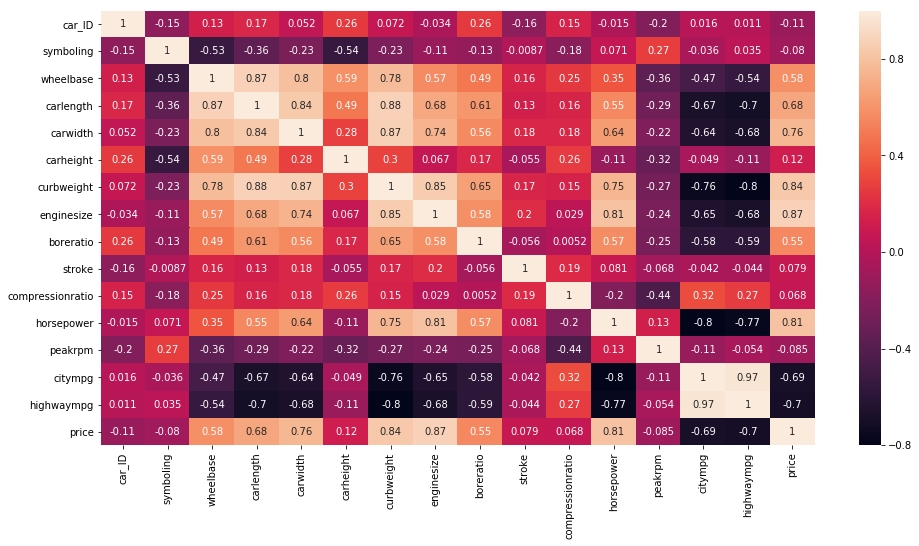

In [6]:
#Checking correlation among variables
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
df.CarName[:30].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [8]:
#Splitting by space to get car brand
k = df.CarName.str.split(" ",expand=True)

In [9]:
k[0].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: 0, dtype: object

In [10]:
df['car_category'] = k[0]  

In [11]:
#Dropping carname column
df = df.drop('CarName',axis =1)

In [12]:
#Dropping car_ID column
df = df.drop('car_ID',axis =1)

In [13]:
df.car_category.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
maxda           2
renault         2
vw              2
Nissan          1
vokswagen       1
toyouta         1
porcshce        1
mercury         1
Name: car_category, dtype: int64

In [14]:
#Renaming multiple enries for same car brand as single brand
df.loc[(df['car_category'] == "vw") | 
         (df['car_category'] == "vokswagen")
         , 'car_category'] = 'volkswagen'

# porsche
df.loc[df['car_category'] == "porcshce", 'car_category'] = 'porsche'

# toyota
df.loc[df['car_category'] == "toyouta", 'car_category'] = 'toyota'

# nissan
df.loc[df['car_category'] == "Nissan", 'car_category'] = 'nissan'

# mazda
df.loc[df['car_category'] == "maxda", 'car_category'] = 'mazda'

In [15]:
df.symboling=df.symboling.astype('object')

In [16]:
X = df.drop('price',axis =1)
y = df[['price']]

In [17]:
car_cat = [key for key in dict(X.dtypes) if dict(X.dtypes)[key] in ['object']]

In [18]:
car_cat_dummies = pd.get_dummies(X[car_cat],drop_first=True)
car_cat_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_category_audi,car_category_bmw,car_category_buick,car_category_chevrolet,car_category_dodge,car_category_honda,car_category_isuzu,car_category_jaguar,car_category_mazda,car_category_mercury,car_category_mitsubishi,car_category_nissan,car_category_peugeot,car_category_plymouth,car_category_porsche,car_category_renault,car_category_saab,car_category_subaru,car_category_toyota,car_category_volkswagen,car_category_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
X = X.drop(car_cat,axis =1)

In [20]:
X = pd.concat([X,car_cat_dummies],axis = 1)

In [21]:

sc = StandardScaler()

In [22]:
X = pd.DataFrame(sc.fit_transform(X),columns = X.columns)

In [23]:

xtrain, xval, ytrain, yval = train_test_split(X, y,test_size = 0.3, random_state=1)

# $$$$$$Modeling$$

# Linear Regression

In [24]:

lr = LinearRegression()

lr.fit(xtrain,ytrain)
ypred = lr.predict(xtrain)

lr_ypred = lr.predict(xval)

print('TRAIN')
print('RMSE: ',np.sqrt(mean_squared_error(ytrain,ypred)))
print('R2 value: ',r2_score(ytrain,ypred)*100)
print('TEST')
print('RMSE: ',np.sqrt(mean_squared_error(yval,lr_ypred)))
print('R2 value: ',r2_score(yval,lr_ypred)*100)


TRAIN
RMSE:  1227.2964804381152
R2 value:  97.66844816305458
TEST
RMSE:  2534.437884878565
R2 value:  89.36009700716141


# Ridge

In [25]:
lambdas = np.linspace(1,100,100)
params = {'alpha':lambdas}


ridge = Ridge()
grid_search = GridSearchCV(ridge,param_grid=params,cv = 10,return_train_score=True)
grid_search.fit(xtrain,ytrain)

#print(grid_search.best_params_)

best_lr_ridge = grid_search.best_estimator_

best_lr_ridge.fit(xtrain,ytrain)
ypred = best_lr_ridge.predict(xtrain)
best_lr_ridge_ypred = best_lr_ridge.predict(xval)

print('TRAIN')
print('RMSE: ',np.sqrt(mean_squared_error(ytrain,ypred)))
print('R2 value: ',r2_score(ytrain,ypred)*100)
print('TEST')
print('RMSE: ',np.sqrt(mean_squared_error(yval,best_lr_ridge_ypred)))
print('R2 value: ',r2_score(yval,best_lr_ridge_ypred)*100)

TRAIN
RMSE:  1476.7909284934294
R2 value:  96.62414231583122
TEST
RMSE:  2436.4793993538224
R2 value:  90.1666872487919


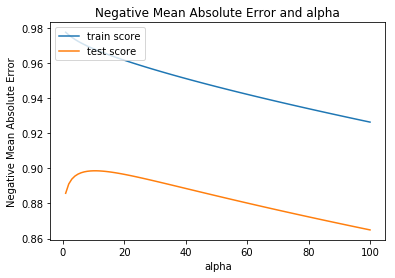

In [26]:
cv_results = pd.DataFrame(grid_search.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Lasso

In [27]:
lasso= Lasso()
grid_search = GridSearchCV(lasso,param_grid=params,cv = 10,return_train_score=True)
grid_search.fit(xtrain,ytrain)
best_lr_lasso = grid_search.best_estimator_

best_lr_lasso.fit(xtrain,ytrain)
ypred = best_lr_lasso.predict(xtrain)
best_lr_lasso_ypred = best_lr_lasso.predict(xval)

print('TRAIN')
print('RMSE: ',np.sqrt(mean_squared_error(ytrain,ypred)))
print('R2 value: ',r2_score(ytrain,ypred)*100)
print('TEST')
print('RMSE: ',np.sqrt(mean_squared_error(yval,best_lr_lasso_ypred)))
print('R2 value: ',r2_score(yval,best_lr_lasso_ypred)*100)

TRAIN
RMSE:  1667.7920008928388
R2 value:  95.69443776655746
TEST
RMSE:  2439.1472152064243
R2 value:  90.14514154659814


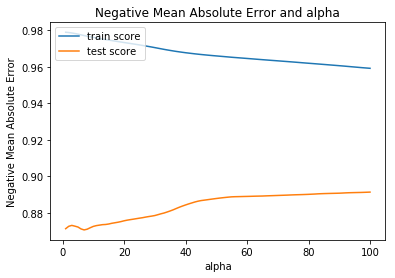

In [28]:
cv_results = pd.DataFrame(grid_search.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Recursive Feature Elimination

In [29]:
# RFE with 20 features
from sklearn.feature_selection import RFE

rfe_20 = RFE(lr, 20)

# fit with 20 features
rfe_20.fit(xtrain, ytrain)

rfe_20_ypred = rfe_20.predict(xval)


print('R2 value: ',r2_score(yval,rfe_20_ypred)*100)

R2 value:  90.67362501087312


In [30]:
# RFE with 6 features
from sklearn.feature_selection import RFE

rfe_6 = RFE(lr, 6)

# fit with 20 features
rfe_6.fit(xtrain, ytrain)

rfe_6_ypred = rfe_6.predict(xval)


print('R2 value: ',r2_score(yval,rfe_6_ypred)*100)

R2 value:  87.81897456353411


# Choosing the optimal number of features

In [33]:
import statsmodels.api as sm 
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lr = LinearRegression()

    # specify number of features
    rfe_n = RFE(lr, n_features)

    # fit with n features
    rfe_n.fit(xtrain, ytrain)

    # subset the features selected by rfe_n
    col_n = xtrain.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = xtrain[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with n variables
    lm_n = sm.OLS(ytrain, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_n sm model
    X_test_rfe_n = xval[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(yval, y_pred))


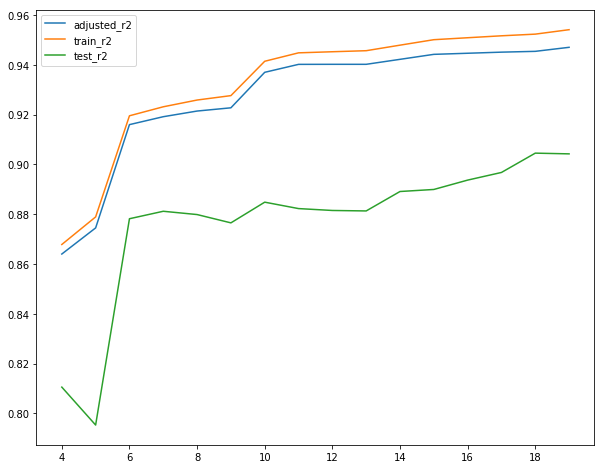

In [34]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

### From the plot it is clear that the test_r2 score doesn't increase much anyway from n=6. It is thus wiser to choose a simpler model, and so let's choose n=6.

In [35]:
cols_6 = xtrain.columns[rfe_6.support_]

xtrain_6 = xtrain[cols_6]

import statsmodels.api as sm 
xtrain_6 = sm.add_constant(xtrain_6)

rfe_6 = sm.OLS(ytrain, xtrain_6).fit()   
#print(rfe_20.summary())
ypred = rfe_6.predict(xtrain_6)
# making predictions using rfe_15 sm model
xval_6 = xval[cols_6]


# # Adding a constant variable 
xval_6 = sm.add_constant(xval_6, has_constant='add')



# # Making predictions
rfe_6_ypred = rfe_6.predict(xval_6)

print('TRAIN')
print('RMSE: ',np.sqrt(mean_squared_error(ytrain,ypred)))
print('R2 value: ',r2_score(ytrain,ypred)*100)
print('TEST')
print('RMSE: ',np.sqrt(mean_squared_error(yval,rfe_6_ypred)))
print('R2 value: ',r2_score(yval,rfe_6_ypred)*100)

TRAIN
RMSE:  2279.7199839990317
R2 value:  91.95531375793124
TEST
RMSE:  2711.7818062605515
R2 value:  87.81897456353414
